#**Grupo 7**

##- Miguel Angel Gómez Pineda
##**Compañero de trabajo:**
##- Camilo Londoño Vera

# Taller Resolver los siguientes problemas, por el metodo de la biseccion, Punto fijo, newton, secante, etc.


1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

------------------------

In [96]:
# Importar librerias

import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

##Se tiene que $e^{x}-2= \cos(e^x-2)$ puede reescribirse como la función: $f(x) = e^{x} - 2 - \cos(e^x-2)$

In [97]:
# Primero se gráfica para observar donde pueden estar las raices de la función 

f = lambda x: (np.exp(x)-2)-(np.cos(np.exp(x)-2))

x = np.linspace(-2, 2, 100)

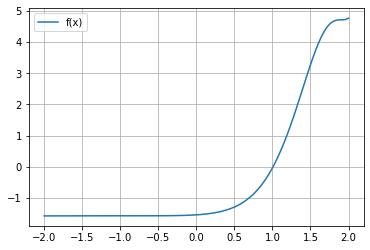

In [98]:
plt.plot(x, f(x), label="f(x)")
plt.grid()
plt.legend()

##Se puede observar que la raiz esta aproximadamente en $x = 1$

##Por lo que se hace la prueba por los métodos de Bisección y Newton

In [99]:
# Método de Bisección

root_bisect = optimize.bisect(f, 0, 4)
print('La raiz por el metodo de biseccion es:  {}'.format(root_bisect))

La raiz por el metodo de biseccion es:  1.0076239716563578


In [100]:
# Método de Newton

root_newt = optimize.newton(f,1)
print('La raiz por el metodo de Newton es:  {}'.format(root_newt))

La raiz por el metodo de Newton es:  1.0076239716581368


In [101]:
# El error asociado a ambos calculos es de
root_newt-root_bisect

1.7790213746593508e-12

---------------

2. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)

-------------------------

##Para este punto se toma:

\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}

\begin{equation}
f(\omega,t ) = 2\omega^2(x(t)+\sin \omega t )
\end{equation}


\begin{equation}
g(\omega,t ) = -g\left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) 
\end{equation}


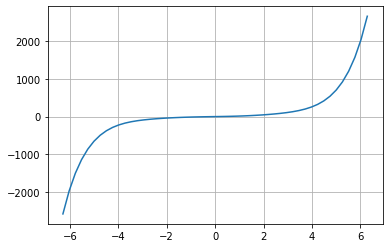

In [102]:
# Primero haciendo la gráfica

f = lambda omega : 2*omega**2 * (0.51+np.sin(omega))
g = lambda omega : -9.76* 0.5*(np.exp(omega)-np.exp(-omega))

h = lambda omega : f(omega)-g(omega)
omega = np.linspace(-2*np.pi, 2*np.pi)
plt.figure()
plt.plot(omega, h(omega) )
plt.grid()

##Se puede observar que la raiz esta en aproximadamente $0$ por lo que se usa el método de Newton.

In [103]:
root_newt = optimize.newton(h, 2)
print('La raiz por el metodo de Newton es:  {}'.format(root_newt))

La raiz por el metodo de Newton es:  6.113797822835222e-17


---------------------------

3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)

--------------------------


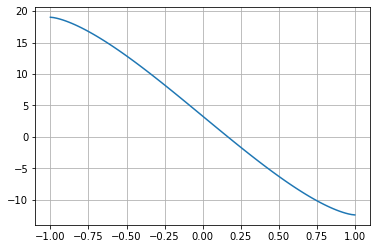

In [104]:
# Primero se gráfica para observar donde puede estar la raiz

r = 1
j = lambda h: (10*((0.5*np.pi)-(np.arcsin(h))-h*((1-(h)**2)**0.5)))-12.4 

h = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(h, j(h) )
plt.grid()

## Aquí se observa que la raiz es aproximadamente $x = 0.5$

In [105]:
# Luego hago uso del metodo de newton para hallar la raiz

root_new = optimize.newton(j, 0)
print('La raiz por el metodo de Newton es:  {}'.format(root_new))

La raiz por el metodo de Newton es:  0.16616603465836785


In [107]:
# Por último se halla la profundidad del agua

depth_water = r - root_new
print ('la profundidad del agua para L=10 ft, r=1 ft, V=12.4 ft es:  {} ft'.format(depth_water))

la profundidad del agua para L=10 ft, r=1 ft, V=12.4 ft es:  0.8338339653416321 ft


-------------------------
4. Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden



-------------------------

In [109]:
# Valores ya conocidos

L = 89
h = 49
D = 55
beta = np.deg2rad (11.5) # Pasa grados a radianes

# se toma las ecuaciones entregadas previamente

A = L*np.sin(beta)
B = L*np.cos(beta)
C = ((h+(0.5*D))*np.sin(beta))-(0.5*D*np.tan(beta))
E = ((h+(0.5*D))*np.cos(beta))-(0.5*D) 


In [110]:
# Ahora haciendo las funciones 

z = lambda alpha: A*np.sin(alpha)*np.cos(alpha)
y = lambda alpha: B*(np.sin(alpha)**2)
w = lambda alpha: C*np.cos(alpha)
v = lambda alpha: E*np.sin(alpha)

u = lambda alpha: z(alpha) + y(alpha) - w(alpha) - v(alpha)

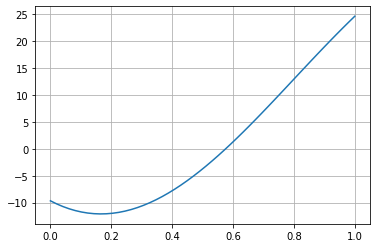

In [111]:
# Graficando

alpha = np.linspace(0, 1)

plt.figure()
plt.plot(alpha, u(alpha) )
plt.grid()

In [112]:
# Usando el método de Newton

root = optimize.newton(u, 0.4)
print('el ángulo alpha se aproxima a:  {}°  '.format(np.rad2deg(root))) # Se pasa de radianes a grados 

el ángulo alpha se aproxima a:  32.972174822419596°  
